In [1]:
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
from scipy import stats
stats.norm.cdf(70,loc=60,scale=10)#stats.norm.cdf(x,loc=mean,scale=sigma)


0.8413447460685429

In [3]:
from scipy import stats
stats.norm.cdf(680,loc=711,scale=29)


0.14254260383881612

In [4]:
p1=stats.norm.cdf(697,loc=711,scale=29)
p1

0.31463356742704107

In [5]:
p2=stats.norm.cdf(740,loc=711,scale=29)
p2

0.8413447460685429

In [6]:
p2-p1

0.5267111786415019

# Glaxo& BEML analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
Glaxo=pd.read_csv('C:/Users/rohi/Desktop/Data Science/02.02.22_Normal Distribution/Glaxo.csv')

In [9]:
BEML=pd.read_csv('C:/Users/rohi/Desktop/Data Science/02.02.22_Normal Distribution/BEML.csv')

In [10]:
Glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [11]:
BEML.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [12]:
Glaxo_df=Glaxo[['Date','Close']]
Glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [13]:
BEML_df=BEML[['Date','Close']]
BEML_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [14]:
'''We will remove the index and add the date column into the datetimeindex'''
Glaxo_df=Glaxo_df.set_index(pd.DatetimeIndex(Glaxo_df['Date']))

In [15]:
Glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


In [16]:
BEML_df=BEML_df.set_index(pd.DatetimeIndex(BEML_df['Date']))
BEML_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


Text(0, 0.5, 'Close price')

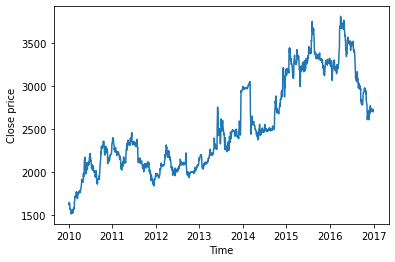

In [17]:
plt.plot(Glaxo_df.Close)

plt.xlabel('Time')
plt.ylabel('Close price')

In [18]:
Glaxo_df['gain']=Glaxo_df.Close.pct_change()
Glaxo_df#close price(today)-clsoe price yesterday/clsoe price yesterday(it is percentatge chang)

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [19]:
BEML_df['gain']=BEML_df.Close.pct_change()
BEML_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [20]:
#drop NaN

Glaxo_df=Glaxo_df.dropna()
BEML_df=BEML_df.dropna()

In [21]:
Glaxo_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [22]:
BEML_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


Text(0, 0.5, 'gain')

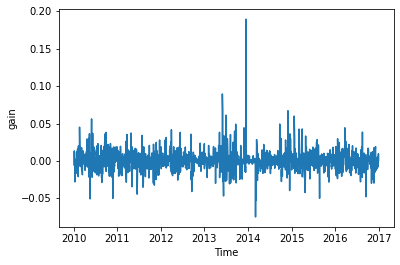

In [23]:
#plot gain data
plt.plot(Glaxo_df.index,Glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

Text(0, 0.5, 'gain')

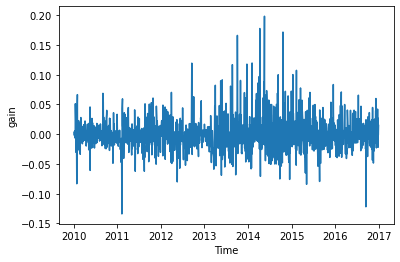

In [24]:
#plot gain data
plt.plot(BEML_df.index,BEML_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

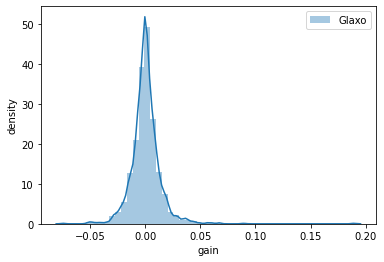

In [25]:
sns.distplot(Glaxo_df.gain,label='Glaxo')#distribution plot
plt.xlabel('gain')
plt.ylabel('density')

plt.legend()

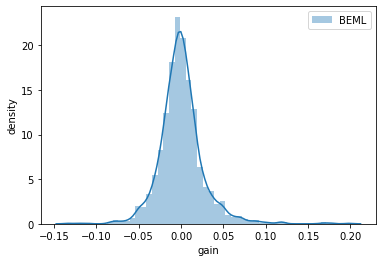

In [26]:
sns.distplot(BEML_df.gain,label='BEML')#distribution plot
plt.xlabel('gain')
plt.ylabel('density')

plt.legend()

In [27]:
print('Mean:',round(Glaxo_df.gain.mean(),4))
print('Std Deviation:',round(Glaxo_df.gain.std(),4))

Mean: 0.0004
Std Deviation: 0.0134


In [28]:
print('Mean:',round(BEML_df.gain.mean(),4))
print('Std Deviation:',round(BEML_df.gain.std(),4))

Mean: 0.0003
Std Deviation: 0.0264


In [29]:
#stats.norm.cdf(x,loc=mean,scale=sigma)
#probability ofmaking 2% loss or higher in Glaxo
stats.norm.cdf(-0.02,loc=Glaxo_df.gain.mean(),scale=Glaxo_df.gain.std())

0.06352488667177397

In [30]:
#probability of making 2% gain or higher in Glaxo
1-stats.norm.cdf(0.02,loc=Glaxo_df.gain.mean(),scale=Glaxo_df.gain.std())

0.07104511457618568

In [31]:
#compute 2 % loss or gain for BEML
#probability of making 2% loss or higher in Glaxo

stats.norm.cdf(-0.02,loc=BEML_df.gain.mean(),scale=BEML_df.gain.std())

0.22155987503755292

In [32]:
#compute 2 % loss or gain for BEML
#probability of making 2% gain or higher in Glaxo

1-stats.norm.cdf(0.02,loc=BEML_df.gain.mean(),scale=BEML_df.gain.std())

0.22769829484075343

# Confidence_Interval

In [36]:
Glaxo_df_CI=stats.norm.interval(0.95,loc= Glaxo_df.gain.mean(),scale=Glaxo_df.gain.std())
print('Gain at 95% CI is:',np.round(Glaxo_df_CI,4))

Gain at 95% CI is: [-0.0258  0.0266]


In [37]:
BEML_df_CI=stats.norm.interval(0.95,loc= BEML_df.gain.mean(),scale=BEML_df.gain.std())
print('Gain at 95% CI is:',np.round(BEML_df_CI,4))

Gain at 95% CI is: [-0.0515  0.0521]
